# Import Packages and Classifiers

In [2]:
#!pip install --user scikit-learn

In [3]:
#!pip install --user matplotlib

In [3]:
#!pip install --user pandas

     |████████████████████████████████| 11.6 MB 4.5 MB/s eta 0:00:01     |██████████████████████████████▊ | 11.2 MB 4.5 MB/s eta 0:00:01


In [6]:
#!pip install --user numpy

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from sklearn import preprocessing

In [7]:
import pandas as pd 
import numpy as np

https://scikit-learn.org/stable/modules/cross_validation.html

# Import Data 

In [12]:
hr_data = pd.read_csv("hr_data.csv")
insurance_data = pd.read_csv("insurance_data.csv")

# First Dataset 
https://www.kaggle.com/arashnic/imbalanced-data-practice?select=aug_train.csv

In [17]:
insurance_data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
...,...,...,...,...,...,...,...,...,...,...,...,...
382149,164549,Male,24,1,15.0,0,< 1 Year,Yes,23938.0,152.0,105,0
382150,247064,Male,27,1,28.0,1,< 1 Year,No,336395.0,152.0,144,0
382151,165293,Male,45,1,28.0,0,1-2 Year,Yes,40443.0,26.0,187,0
382152,383241,Female,28,1,28.0,1,< 1 Year,No,25380.0,152.0,208,0


## Prep Data for Modeling 

In [18]:
insurance_data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [39]:
le = preprocessing.LabelEncoder()
le.fit(insurance_data.Gender.unique())
insurance_data['Gender'] = le.transform(insurance_data.Gender)

#Vehicle_Age 
le1 = preprocessing.LabelEncoder()
le1.fit(insurance_data.Vehicle_Age.unique())
insurance_data['Vehicle_Age'] = le1.transform(insurance_data.Vehicle_Age)

#Vehicle_Damage 
le2 = preprocessing.LabelEncoder()
le2.fit(insurance_data.Vehicle_Damage.unique())
insurance_data['Vehicle_Damage'] = le2.transform(insurance_data.Vehicle_Damage)

In [40]:
target = 'Response'
cols = ['Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage']

#splitn into training and testing data sets
train, test = train_test_split(insurance_data, test_size=0.3)

## Decision Tree with Pruning 
https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

https://www.analyticsvidhya.com/blog/2020/10/cost-complexity-pruning-decision-trees/

In [42]:
decision_tree = DecisionTreeClassifier(random_state=0)
path = decision_tree.cost_complexity_pruning_path(train[cols], train[target])
ccp_alphas, impurities = path.ccp_alphas, path.impurities


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

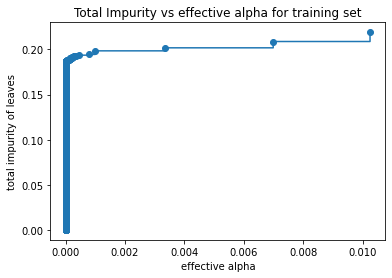

In [43]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

## Neural Network
https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [45]:
nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

nn.fit(train[cols], train[target])

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

## Boosting 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#:~:text=An%20AdaBoost%20%5B1%5D%20classifier%20is,focus%20more%20on%20difficult%20cases.

In [46]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(train[cols], train[target])

AdaBoostClassifier(n_estimators=100, random_state=0)

## Support Vector Machines 
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

In [ ]:

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(train[cols], train[target])

## K Nearest Neighbors
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train[cols], train[target])

# Second Dataset   

https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=aug_train.csv

## Prep Data for Modeling 

## Decision Tree with Pruning 

## Neural Network

## Boosting 

## Boosting 

## Support Vector Machines 